# Iris Flower Classification | Machine Learning 

Description : Classification of Iris flower dataset based on their features - _sepal length, selpal widh, petal length, petal width_ of this dataset using different SVM kernel and determination of best Kernel performance.

Python libraries used :
    1. Pandas
    2. Numpy
    3. Scikit-learn
    4. Matplotlib

Import pandas and Scikit-learn Iris dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

## Analyzing the Data

Load the dataset into _iris_data_ and inspect its basic features

In [5]:
iris_data = load_iris()
dir(iris_data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [78]:
type(iris_data)

sklearn.utils.Bunch

Let us explore the _feature_names_

In [80]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We have four features to compare. Create a dataframe with these four features for better visulization

In [13]:
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let us explore _target_names_  and  _target_ features

In [81]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [82]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

First 50 flower is **_setosa_** corresponding to **_0_** value, next 50 is **_versicolor_** with value **_1_** and next 50 is **_virginica_** with value **_2_**

Load the data frame _df_ with _target_ and _target_names_

In [83]:
df['target'] = iris_data.target
df['flower_name'] = df.target.apply(lambda x : iris_data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Let us examine dataframe _df_

In [84]:
df[df.target == 0].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
target               50
flower_name          50
dtype: int64

In [85]:
df[df.target == 1].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
target               50
flower_name          50
dtype: int64

In [86]:
df[df.target == 2].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
target               50
flower_name          50
dtype: int64

In [87]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
flower_name          150
dtype: int64

## Visualizing Data separately

Create dataframe with three different flowers

In [88]:
df_setosa = df[df.target == 0]
df_versicolor = df[df.target == 1]
df_virginica = df[df.target == 2]

Plot the features for better comparison and visualization

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'sepal width (cm)')

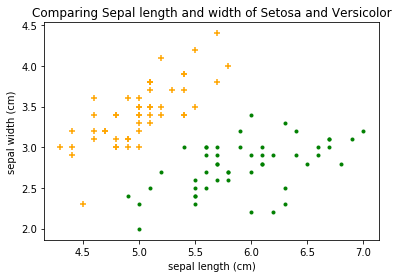

In [121]:
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color = 'orange', marker = '+')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color = 'green', marker = '.')
plt.title('Comparing Sepal length and width of Setosa and Versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

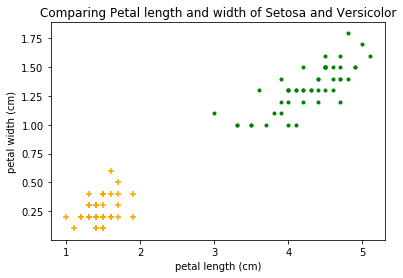

In [111]:
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], color = 'orange', marker = '+')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], color = 'green', marker = '.')
plt.title('Comparing Petal length and width of Setosa and Versicolor')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

We will make use of SVM model for classification. Prepare training and test data with _X_ as features and _Y_ as labels.

We use _features_ - __sepal length__ and __sepal width__ and _label_ - __target__

In [316]:
X = df.drop(['flower_name', 'target', 'petal length (cm)', 'petal width (cm)'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [317]:
X['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [318]:
Y = df.target
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## Training the Models

Import SVC model from sklearn and create SVM model with different kernel. Play with different values of C and gamma.

In [341]:
from sklearn.svm import SVC
svm_linear = SVC(C = 1, kernel = 'linear')              # Linear Kernel SVM
svm_poly = SVC(C = 1, kernel = 'poly', degree = 2)      # Polynomial Kernel SVM
svm_rbf = SVC(C = 1, kernel = 'rbf', gamma = 0.1)       # Gaussian Kernel SVM

Spliting the features and labels into 80% training and 20% test data

In [324]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Fit the models with trainig data

In [325]:
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Making Model Prediction and Computing Accuracy

Compare the score of each SVM Kernel with test data

In [326]:
y_pred_linear = svm_linear.predict(x_test)
y_pred_poly = svm_poly.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

print('Accuracy with Linear kernel SVM', svm_linear.score(x_test, y_test))
print('Accuracy with Polynomial kernel SVM', svm_poly.score(x_test, y_test))
print('Accuracy with rbf kernel SVM', svm_rbf.score(x_test, y_test))

Accuracy with Linear kernel SVM 0.9
Accuracy with Polynomial kernel SVM 0.8666666666666667
Accuracy with rbf kernel SVM 0.8666666666666667


After comparison we found that SVM model with linear kernel has high accuracy = 90 %

## Evaluating the Model

In [327]:
from sklearn.metrics import confusion_matrix, classification_report

### 1. Evaluating Linear Kernel SVM

In [328]:
print('Confusion Matrix for Linear Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_linear))
print('\n\n\nClassification Report for Linear Kernel SVM :\n\n', classification_report(y_test,y_pred_linear))

Confusion Matrix for Linear Kernel SVM :

 [[13  0  0]
 [ 0  8  3]
 [ 0  0  6]]



Classification Report for Linear Kernel SVM :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.73      0.84        11
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30



### 2. Evaluating Polynomial Kernel SVM

In [329]:
print('Confusion Matrix for Polynomial Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_poly))
print('\n\n\nClassification Report for Polynomial Kernel SVM :\n\n', classification_report(y_test,y_pred_poly))

Confusion Matrix for Polynomial Kernel SVM :

 [[13  0  0]
 [ 0  8  3]
 [ 0  1  5]]



Classification Report for Polynomial Kernel SVM :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.73      0.80        11
           2       0.62      0.83      0.71         6

    accuracy                           0.87        30
   macro avg       0.84      0.85      0.84        30
weighted avg       0.88      0.87      0.87        30



### 3. Evaluating Gaussian Kernel SVM

In [330]:
print('Confusion Matrix for Gaussian Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_rbf))
print('\n\n\nClassification Report for Gaussian Kernel SVM :\n\n', classification_report(y_test,y_pred_rbf))

Confusion Matrix for Gaussian Kernel SVM :

 [[13  0  0]
 [ 0  7  4]
 [ 0  0  6]]



Classification Report for Gaussian Kernel SVM :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.64      0.78        11
           2       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.88      0.84        30
weighted avg       0.92      0.87      0.87        30



## Decision Boundary

In [1]:
# Function to generate the plotting space
def grid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


# Function to plot the Decision Boundary
def Plot_Decision_Boundary(model, title, **params):
    fig, ax = plt.subplots()
    x0, x1 = X['sepal length (cm)'], X['sepal width (cm)']
    xx, yy = grid(x0, x1)
    
    B = model.predict(np.c_[xx.ravel(), yy.ravel()])
    B = B.reshape(xx.shape)
    ax.contourf(xx, yy, B, **params)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.gist_earth, s=20, edgecolors='k')
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width')
    ax.set_title(title)
    plt.show()

title_list = ['Decision Boundary with Linear Kernel SVM',
             'Decision Boundary with Polynomial Kernel SVM',
             'Decision Boundary with Gaussian Kernel SVM']

model_list = [svm_linear, svm_poly, svm_rbf]

NameError: name 'svm_linear' is not defined

In [340]:
#for i in range(0, len(title_list)):
    #Plot_Decision_Boundary(model_list[i], title_list[i], cmap=plt.cm.gist_earth, alpha=0.7)


### 1. Linear Kernel SVM

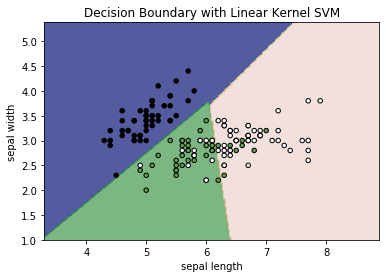

In [337]:
Plot_Decision_Boundary(model_list[0], title_list[0], cmap=plt.cm.gist_earth, alpha=0.7)

### 2. Polynomial Kernel SVM

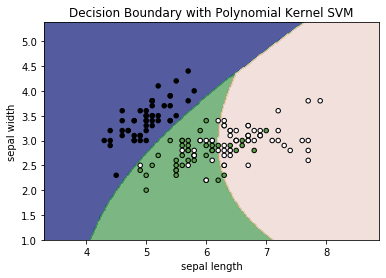

In [338]:
Plot_Decision_Boundary(model_list[1], title_list[1], cmap=plt.cm.gist_earth, alpha=0.7)

### 3. Gaussian Kernel SVM

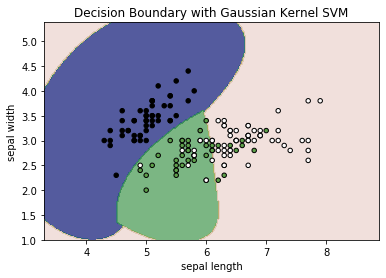

In [339]:
Plot_Decision_Boundary(model_list[2], title_list[2], cmap=plt.cm.gist_earth, alpha=0.7)

## Result

Iris Dataset Classification using SVM model has highest accuracy with Linear Kernel